<!-- Notebook title -->
# Title

# 1. Notebook Description

### 1.1 Task Description
<!-- 
- A brief description of the problem you're solving with machine learning.
- Define the objective (e.g., classification, regression, clustering, etc.).
-->

TODO

### 1.2 Useful Resources
<!--
- Links to relevant papers, articles, or documentation.
- Description of the datasets (if external).
-->

### 1.2.1 Data

#### 1.2.1.1 Common

* [Datasets Kaggle](https://www.kaggle.com/datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;A vast repository of datasets across various domains provided by Kaggle, a platform for data science competitions.
  
* [Toy datasets from Sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)  
  &nbsp;&nbsp;&nbsp;&nbsp;A collection of small datasets that come with the Scikit-learn library, useful for quick prototyping and testing algorithms.
  
* [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)  
  &nbsp;&nbsp;&nbsp;&nbsp;A widely-used repository for machine learning datasets, with a variety of real-world datasets available for research and experimentation.
  
* [Google Dataset Search](https://datasetsearch.research.google.com/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A tool from Google that helps to find datasets stored across the web, with a focus on publicly available data.
  
* [AWS Public Datasets](https://registry.opendata.aws/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A registry of publicly available datasets that can be analyzed on the cloud using Amazon Web Services (AWS).
  
* [Microsoft Azure Open Datasets](https://azure.microsoft.com/en-us/services/open-datasets/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A collection of curated datasets from various domains, made available by Microsoft Azure for use in machine learning and analytics.
  
* [Awesome Public Datasets](https://github.com/awesomedata/awesome-public-datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;A GitHub repository that lists a wide variety of datasets across different domains, curated by the community.
  
* [Data.gov](https://www.data.gov/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A portal to the US government's open data, offering access to a wide range of datasets from various federal agencies.
  
* [Google BigQuery Public Datasets](https://cloud.google.com/bigquery/public-data)  
  &nbsp;&nbsp;&nbsp;&nbsp;Public datasets hosted by Google BigQuery, allowing for quick and powerful querying of large datasets in the cloud.
  
* [Papers with Code](https://paperswithcode.com/datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;A platform that links research papers with the corresponding code and datasets, helping researchers reproduce results and explore new data.
  
* [Zenodo](https://zenodo.org/)  
  &nbsp;&nbsp;&nbsp;&nbsp;An open-access repository that allows researchers to share datasets, software, and other research outputs, often linked to academic publications.
  
* [The World Bank Open Data](https://data.worldbank.org/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A comprehensive source of global development data, with datasets covering various economic and social indicators.
  
* [OpenML](https://www.openml.org/)  
  &nbsp;&nbsp;&nbsp;&nbsp;An online platform for sharing datasets, machine learning experiments, and results, fostering collaboration in the ML community.
  
* [Stanford Large Network Dataset Collection (SNAP)](https://snap.stanford.edu/data/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A collection of large-scale network datasets from Stanford University, useful for network analysis and graph-based machine learning.
  
* [KDnuggets Datasets](https://www.kdnuggets.com/datasets/index.html)  
  &nbsp;&nbsp;&nbsp;&nbsp;A curated list of datasets for data mining and data science, compiled by the KDnuggets community.


#### 1.2.1.2 Project

### 1.2.2 Learning

* [K-Nearest Neighbors on Kaggle](https://www.kaggle.com/code/mmdatainfo/k-nearest-neighbors)

* [Complete Guide to K-Nearest-Neighbors](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor)

### 1.2.3 Documentation

---

# 2. Setup

## 2.1 Imports
<!--
- Import necessary libraries (e.g., `numpy`, `pandas`, `matplotlib`, `scikit-learn`, etc.).
-->

In [1]:
from ikt450.src.common_imports import *
from ikt450.src.config import get_paths
from ikt450.src.common_func import load_dataset, save_dataframe, ensure_dir_exists

import torch
import torchvision
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## 2.2 Global Variables
<!--
- Define global constants, paths, and configuration settings used throughout the notebook.
-->

### 2.2.1 Paths

In [2]:
paths = get_paths()

### 2.2.3 Split ratio

In [3]:
SPLITRATIO = 0.8

In [4]:
paths

{'PATH_PROJECT_ROOT': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450',
 'PATH_ASSIGNMENTS': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\assignments',
 'PATH_COMMON': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\common',
 'PATH_COMMON_DATASETS': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\common\\datasets',
 'PATH_COMMON_NOTEBOOKS': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\common\\notebooks',
 'PATH_COMMON_RESOURCES': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\common\\resources',
 'PATH_COMMON_SCRIPTS': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\common\\scripts',
 'PATH_REPORTS': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\reports',
 'PATH_SRC': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\src',
 'PATH_1_KNN': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\assignments\\1_knn',
 'PATH_2_MLP': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\assignments\\2_mlp',
 'PATH_CNN': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\assignments\\CNN'}

In [5]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset


In [6]:
# Load the dataset Food11 from PATH_COMMON_DATASETS/food11
# the folder structure is PATH_COMMON_DATASETS/food11/training and PATH_COMMON_DATASETS/food11/evaluation and PATH_COMMON_DATASETS/food11/validation
#  and in these folders there are 11 subfolders with the class names
#  and in these subfolders there are the images
#  the dataset is loaded with the torchvision.datasets.ImageFolder function
#  and the images are transformed to tensors and normalized

# find the mean and std of the dataset at paths['PATH_COMMON_DATASETS']}/food11/training
#  and use these values to normalize the images
#  the values are found with the function get_mean_std
from torchvision import transforms
mean = [0.485, 0.456, 0.406]  # ImageNet mean
std = [0.229, 0.224, 0.225]   # ImageNet std






train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),        # Randomly crop the image to 224x224
    transforms.RandomHorizontalFlip(),        # Randomly flip the image horizontally
    transforms.RandomRotation(15),            # Randomly rotate the image by 15 degrees
    transforms.ColorJitter(                   # Randomly change brightness, contrast, saturation, and hue
        brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1
    ),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

test_transform = transforms.Compose([
    transforms.Resize(256),                   # Resize the shorter side to 256 pixels
    transforms.CenterCrop(224),               # Crop the center 224x224 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])




train_dataset = torchvision.datasets.ImageFolder(root=f"{paths['PATH_COMMON_DATASETS']}/food11/training" , transform=train_transform)
train_dataset
test_dataset = torchvision.datasets.ImageFolder(root=f"{paths['PATH_COMMON_DATASETS']}/food11/evaluation" , transform=test_transform)
test_dataset
val_dataset = torchvision.datasets.ImageFolder(root=f"{paths['PATH_COMMON_DATASETS']}/food11/validation" , transform=test_transform)
val_dataset

Dataset ImageFolder
    Number of datapoints: 3430
    Root location: C:\Users\jonin\Documents\ikt450\ikt450\common\datasets/food11/validation
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [7]:
# look at label distribution
# sum up the number of images in each class

label_count = {}
for i in train_dataset.targets:
    if i in label_count:
        label_count[i] += 1
    else:
        label_count[i] = 1
label_count

{0: 994,
 1: 429,
 2: 1500,
 3: 986,
 4: 848,
 5: 1325,
 6: 440,
 7: 280,
 8: 855,
 9: 1500,
 10: 709}

In [8]:
# create data loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=6)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)


## 2.3 Function Definitions
<!--
- Define helper functions that will be used multiple times in the notebook.
- Consider organizing these into separate sections (e.g., data processing functions, model evaluation functions).
-->

---

# 4. Data Processing

---

# 5. Model Development

## 5.1 Model Selection
<!--
- Choose the model(s) to be trained (e.g., linear regression, decision trees, neural networks).
-->

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        # First convolutional layer (input channels=3 for RGB, output channels=6, kernel size=5)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        
        # Second convolutional layer (input channels=6, output channels=16, kernel size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        
        # After two conv + pooling layers, the feature map size will be reduced.
        # For an input image of size 224x224, the final feature map size after conv and pooling is 53x53.
        # 16 * 53 * 53 = 44944 flattened features going into the first fully connected layer.
        self.fc1 = nn.Linear(16 * 53 * 53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 11)  # Output layer for classification (e.g., 10 classes)

    def forward(self, x):
        # First convolution, ReLU, and max-pooling layer
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)  # Output size: (6, 110, 110)
        
        # Second convolution, ReLU, and max-pooling layer
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2)  # Output size: (16, 53, 53)
        
        # Flatten the feature maps for the fully connected layers
        x = x.view(-1, 16 * 53 * 53)  # Reshape to (batch_size, 16 * 53 * 53)
        
        # Fully connected layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        # Output layer (raw scores for classification)
        x = self.fc3(x)
        
        return x


## 5.2 Model Training
<!--
- Train the selected model(s) using the training data.
-->

In [10]:
model = LeNet()

model.to(device)
model
from torchsummary import summary


In [11]:

# define the loss function and the optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.001, momentum=0.9)

n_epochs = 10



In [ ]:
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    with torch.no_grad():
        val_loss = 0.0
        for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    print(f"{epoch + 1} loss: {running_loss / len(train_loader)} val_loss: {val_loss / len(val_loader)}")

    running_loss = 0.0

1 loss: 2.2912628696810815 val_loss: 2.229588281225275
2 loss: 2.235491644951605 val_loss: 2.1882103460806386
3 loss: 2.2063608738683884 val_loss: 2.1520470314555697


In [13]:
# evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, precision_score, recall_score
val_loss = 0.0
val_labels = []
val_preds = []

model.eval()
with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        val_labels += labels.cpu().numpy().tolist()
        val_preds += preds.cpu().numpy().tolist()

print(f"Validation loss: {val_loss / len(val_loader)}")
print(f"Validation accuracy: {accuracy_score(val_labels, val_preds)}")
print(f"Validation f1: {f1_score(val_labels, val_preds, average='macro')}")
print(f"Validation precision: {precision_score(val_labels, val_preds, average='macro')}")
print(f"Validation recall: {recall_score(val_labels, val_preds, average='macro')}")
print(classification_report(val_labels, val_preds, target_names=train_dataset.classes,digits=4))


Validation loss: 1.922408684536263
Validation accuracy: 0.3422740524781341
Validation f1: 0.2560510842505256
Validation precision: 0.2967326178036116
Validation recall: 0.27873730041204237
                 precision    recall  f1-score   support

          Bread     0.0000    0.0000    0.0000       362
  Dairy product     0.4000    0.1250    0.1905       144
        Dessert     0.2892    0.4760    0.3598       500
            Egg     0.2674    0.2232    0.2433       327
     Fried food     0.2846    0.3466    0.3126       326
           Meat     0.3266    0.5724    0.4159       449
  Noodles-Pasta     0.4167    0.0340    0.0629       147
           Rice     0.0000    0.0000    0.0000        96
        Seafood     0.3618    0.1585    0.2204       347
           Soup     0.4235    0.5700    0.4859       500
Vegetable-Fruit     0.4943    0.5603    0.5253       232

       accuracy                         0.3423      3430
      macro avg     0.2967    0.2787    0.2561      3430
   weighted

c:\Users\jonin\.conda\envs\pytorch_24\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jonin\.conda\envs\pytorch_24\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jonin\.conda\envs\pytorch_24\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c

In [18]:
# import resnet18
import torchvision.models as models
resnet18 = models.resnet101(weights=models.ResNet101_Weights.IMAGENET1K_V1)
resnet18.fc = nn.Linear(resnet18.fc.in_features, 11)

# Freeze all layers
#for param in resnet18.parameters():
#    param.requires_grad = False

# Unfreeze the final fully connected layer
#for param in resnet18.fc.parameters():
#    param.requires_grad = True

resnet18.to(device)
resnet18


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)
lr_scheduler = optim.lr_scheduler.StepLR(optimizer,step_size=5, gamma=0.1)
n_epochs = 30

In [20]:
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        lr_scheduler.step()
        running_loss += loss.item()
    
    with torch.no_grad():
        val_loss = 0.0
        for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet18(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    print(f"{epoch + 1} loss: {running_loss / len(train_loader)} val_loss: {val_loss / len(val_loader)}")

    running_loss = 0.0

1 loss: 2.292326419584213 val_loss: 2.341634397153501
2 loss: 2.286806881812311 val_loss: 2.341634397153501
3 loss: 2.287719846540882 val_loss: 2.341634397153501
4 loss: 2.2863779867849043 val_loss: 2.341634397153501
5 loss: 2.2862350371576126 val_loss: 2.341634397153501
6 loss: 2.287271954936366 val_loss: 2.341634397153501
7 loss: 2.2865043932391753 val_loss: 2.341634397153501
8 loss: 2.291067068038448 val_loss: 2.341634397153501
9 loss: 2.287271024334815 val_loss: 2.341634397153501
10 loss: 2.2893575837535245 val_loss: 2.341634397153501


KeyboardInterrupt: 

In [21]:
# evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, precision_score, recall_score
val_loss = 0.0
val_labels = []
val_preds = []

model.eval()
with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        val_labels += labels.cpu().numpy().tolist()
        val_preds += preds.cpu().numpy().tolist()

print(f"Validation loss: {val_loss / len(val_loader)}")
print(f"Validation accuracy: {accuracy_score(val_labels, val_preds)}")
print(f"Validation f1: {f1_score(val_labels, val_preds, average='macro')}")
print(f"Validation precision: {precision_score(val_labels, val_preds, average='macro')}")
print(f"Validation recall: {recall_score(val_labels, val_preds, average='macro')}")
print(classification_report(val_labels, val_preds, target_names=train_dataset.classes,digits=4))


Validation loss: 2.341634397153501
Validation accuracy: 0.13760932944606413
Validation f1: 0.06650642827543975
Validation precision: 0.09505919624063885
Validation recall: 0.09130220753967308
                 precision    recall  f1-score   support

          Bread     0.0808    0.0221    0.0347       362
  Dairy product     0.0000    0.0000    0.0000       144
        Dessert     0.1458    0.4100    0.2151       500
            Egg     0.0966    0.0612    0.0749       327
     Fried food     0.2500    0.0092    0.0178       326
           Meat     0.1393    0.1849    0.1589       449
  Noodles-Pasta     0.0000    0.0000    0.0000       147
           Rice     0.0000    0.0000    0.0000        96
        Seafood     0.1053    0.0058    0.0109       347
           Soup     0.1409    0.2940    0.1905       500
Vegetable-Fruit     0.0870    0.0172    0.0288       232

       accuracy                         0.1376      3430
      macro avg     0.0951    0.0913    0.0665      3430
   weigh

c:\Users\jonin\.conda\envs\pytorch_24\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jonin\.conda\envs\pytorch_24\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jonin\.conda\envs\pytorch_24\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c

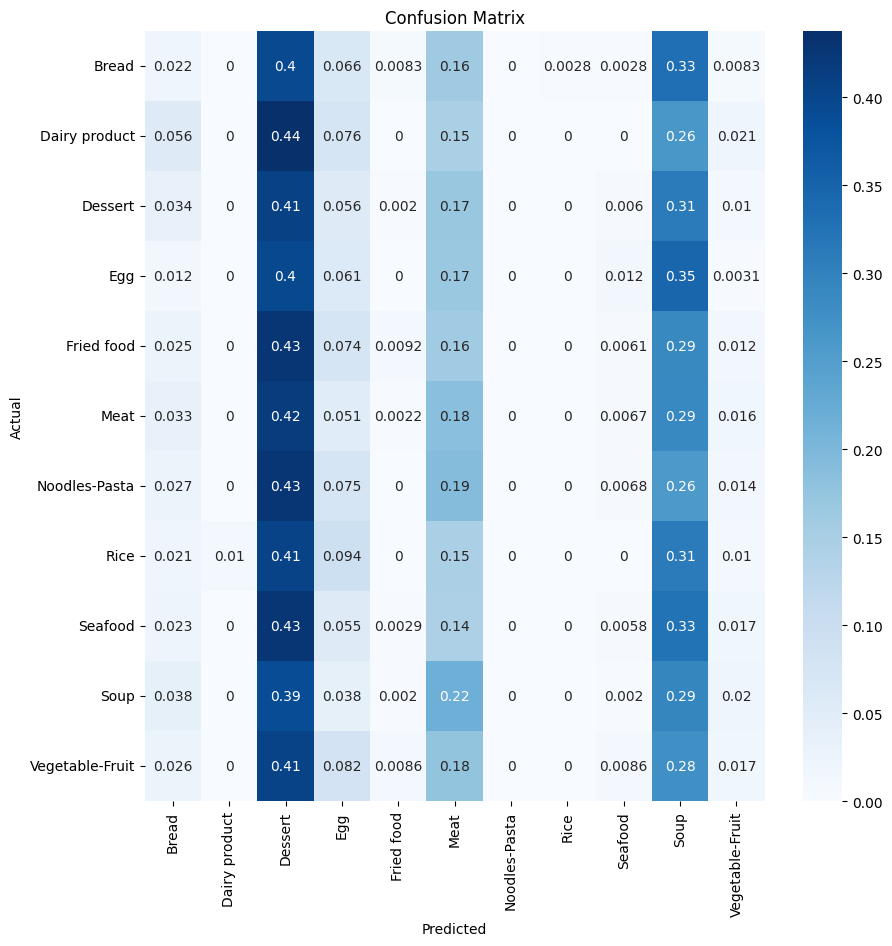

In [22]:
# plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(val_labels, val_preds, normalize='true')
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, xticklabels=train_dataset.classes, yticklabels=train_dataset.classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 5.3 Model Evaluation
<!--
- Evaluate model performance on validation data.
- Use appropriate metrics (e.g., accuracy, precision, recall, RMSE).
-->

## 5.4 Hyperparameter Tuning
<!--
- Fine-tune the model using techniques like Grid Search or Random Search.
- Evaluate the impact of different hyperparameters.
-->

## 5.5 Model Testing
<!--
- Evaluate the final model on the test dataset.
- Ensure that the model generalizes well to unseen data.
-->

## 5.6 Model Interpretation (Optional)
<!--
- Interpret the model results (e.g., feature importance, SHAP values).
- Discuss the strengths and limitations of the model.
-->

---

# 6. Predictions


## 6.1 Make Predictions
<!--
- Use the trained model to make predictions on new/unseen data.
-->

## 6.2 Save Model and Results
<!--
- Save the trained model to disk for future use.
- Export prediction results for further analysis.
-->

---

# 7. Documentation and Reporting

## 7.1 Summary of Findings
<!--
- Summarize the results and findings of the analysis.
-->

## 7.2 Next Steps
<!--
- Suggest further improvements, alternative models, or future work.
-->

## 7.3 References
<!--
- Cite any resources, papers, or documentation used.
-->